In [ ]:
# Road Map
# Problem Reg/Class
# Data collect:-
#     ola, uber
# Modules call
# Data EDA
# null, fill, dtpe conv
# Data Preprocessing:- feature engineering/feature scalling
# feature vs target break
# split
# linear reg, lasso, ridge, ols, dt, rf, svm, knn
# hyper, grid, cv, pca
# matrices:- MSe, MAE, RMSE, R2_score, Model.score
# Best Model
# Value predict
# html structure
# css , js
# backend:- flask, fastapi, django
# MYSQL

In [ ]:
# Problem Reg/Class:- Regression

# Import Modules


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import pymysql as py
import warnings
from datetime import datetime
# ---------------------------------------
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
# -----------------------------------------
# BOOSTING
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
print('All modules Imported Successfully!!')

All modules Imported Successfully!!


# Data Load

In [4]:
df = pd.read_csv('Taxi_data.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-23 15:12:00.000000132,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1


# Key column drop

In [5]:
df.drop('key',axis = 1, inplace=True)

# Head

In [6]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1


In [7]:
# ! pip install geopy

In [8]:
from geopy.distance import geodesic

# Geo distance calculate

In [9]:
geodesic((40.730610,-73.935242),
        (48.864716,2.349014)).miles

3632.7800671013547

In [10]:
def calculate_distance(pickup_lat, 
                       pickup_long, 
                       dropoff_lat, 
                       dropoff_long):
    
    
    return geodesic((pickup_lat, pickup_long), 
                    (dropoff_lat, dropoff_long)).miles


In [11]:
calculate_distance(40.730610,-73.935242,48.864716,2.349014)

3632.7800671013547

In [12]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [13]:
df.shape

(9999, 7)

In [14]:
df = df[df['pickup_latitude']<=90]
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.1,2010-04-23 15:12:00 UTC,-73.973925,40.748950,-73.966458,40.753695,1
1,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
2,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
3,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
4,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
...,...,...,...,...,...,...,...
9994,6.5,2010-02-15 15:52:46 UTC,-74.004429,40.721271,-74.006460,40.739435,3
9995,4.1,2010-08-27 08:45:01 UTC,-73.983616,40.756005,-73.976169,40.763282,1
9996,11.7,2011-10-26 10:44:00 UTC,-73.988277,40.748970,-73.963712,40.773958,2
9997,5.7,2011-12-16 15:37:00 UTC,-74.002112,40.748727,-73.992467,40.756252,1


In [15]:
df.shape

(9998, 7)

# Create New column Distance

In [16]:
df['distance'] = df.apply(lambda row: calculate_distance(row['pickup_latitude'],
         row['pickup_longitude'],
         row['dropoff_latitude'],
         row['dropoff_longitude']),axis=1)
print('done')

done


In [17]:
df[df['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance


In [18]:
df[df['pickup_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance


In [19]:
df.shape

(9998, 8)

In [20]:
df.sample()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
2722,7.0,2012-11-25 22:30:29 UTC,-73.975538,40.749493,-73.988977,40.758842,1,0.955744


# Info

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        9998 non-null   float64
 1   pickup_datetime    9998 non-null   object 
 2   pickup_longitude   9998 non-null   float64
 3   pickup_latitude    9998 non-null   float64
 4   dropoff_longitude  9998 non-null   float64
 5   dropoff_latitude   9998 non-null   float64
 6   passenger_count    9998 non-null   int64  
 7   distance           9998 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 703.0+ KB


# Convert object to datetime

In [22]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        9998 non-null   float64            
 1   pickup_datetime    9998 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9998 non-null   float64            
 3   pickup_latitude    9998 non-null   float64            
 4   dropoff_longitude  9998 non-null   float64            
 5   dropoff_latitude   9998 non-null   float64            
 6   passenger_count    9998 non-null   int64              
 7   distance           9998 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 703.0 KB


# # Extract date and time features

In [24]:
# Extract date and time features

df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute
df['second'] = df['pickup_datetime'].dt.second

In [26]:
df.shape

(9998, 14)

In [27]:
df.sample()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,hour,minute,second
5917,4.5,2012-01-31 17:17:00+00:00,-73.982577,40.760287,-73.989672,40.756845,5,0.441583,2012,1,31,17,17,0


# drop pickup_datetime

In [28]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [29]:
df.shape

(9998, 13)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        9998 non-null   float64
 1   pickup_longitude   9998 non-null   float64
 2   pickup_latitude    9998 non-null   float64
 3   dropoff_longitude  9998 non-null   float64
 4   dropoff_latitude   9998 non-null   float64
 5   passenger_count    9998 non-null   int64  
 6   distance           9998 non-null   float64
 7   year               9998 non-null   int32  
 8   month              9998 non-null   int32  
 9   day                9998 non-null   int32  
 10  hour               9998 non-null   int32  
 11  minute             9998 non-null   int32  
 12  second             9998 non-null   int32  
dtypes: float64(6), int32(6), int64(1)
memory usage: 859.2 KB


# Null values check

In [31]:
df.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance             0
year                 0
month                0
day                  0
hour                 0
minute               0
second               0
dtype: int64

In [32]:
df.sample()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,hour,minute,second
9335,6.9,-73.987222,40.766107,-74.004853,40.74181,2,1.914879,2010,1,3,21,33,0


In [33]:
# df['fare_amount'].plot.hist()

In [34]:
# X.columns.to_list()

# Univariate analysis of fare amount

<Axes: xlabel='fare_amount', ylabel='Count'>

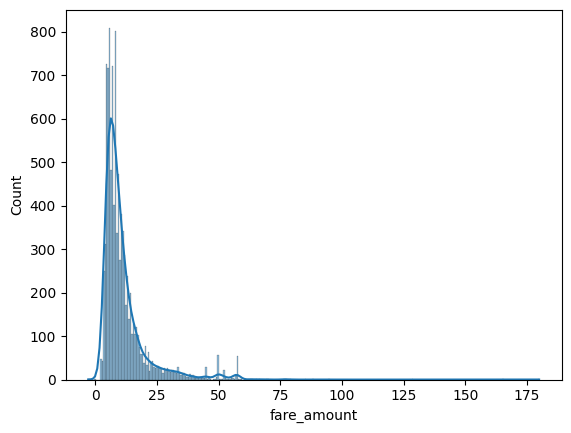

In [35]:
sns.histplot(df['fare_amount'],kde=True)

# Maximum fare lies between $2 to $20
# Fare_amount has more outliers

# Checking Outliers

<Axes: >

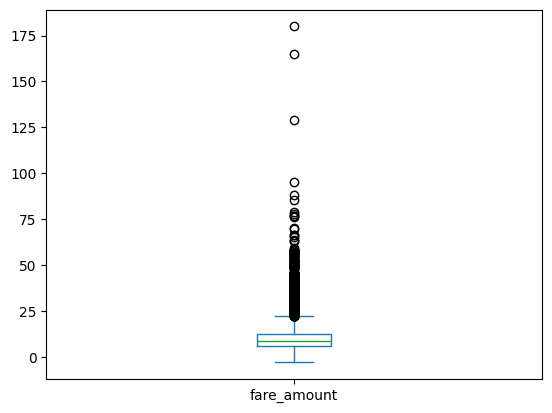

In [36]:
df['fare_amount'].plot(kind='box')

# No of rides per year

<Axes: xlabel='year', ylabel='count'>

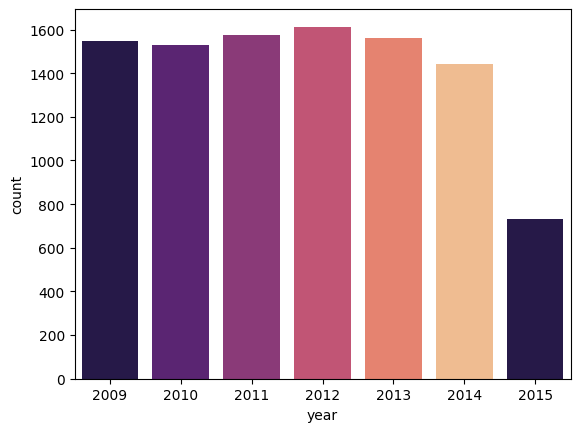

In [37]:
sns.countplot(data = df, x = 'year',palette=sns.color_palette('magma'))

# Rides for 2015

In [38]:
df_2015 = df[df['year'] == 2015]

<Axes: xlabel='month', ylabel='count'>

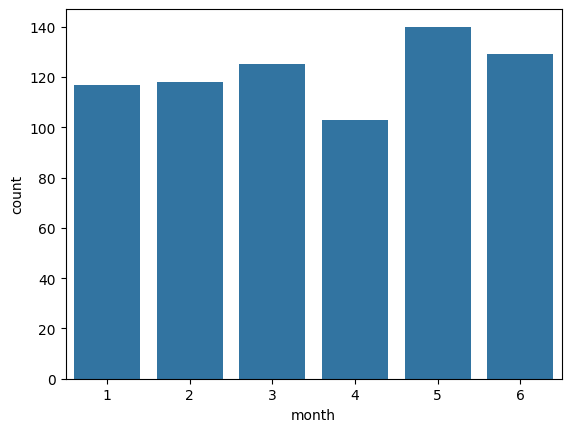

In [39]:
sns.countplot(data = df_2015, x = 'month')

In [40]:
sorted_df = df.sort_values(by='day')

# Rides per day

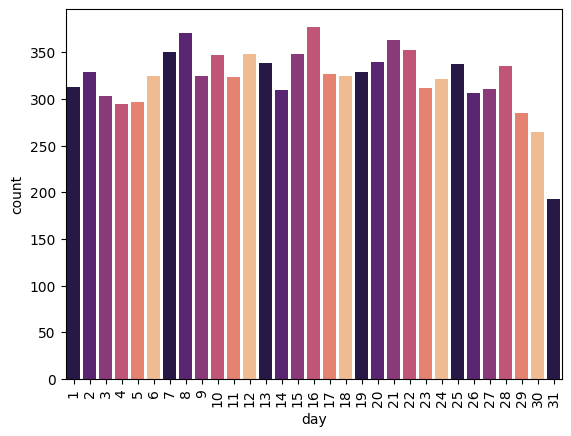

In [41]:
sns.countplot(data = sorted_df, x = 'day',palette=sns.color_palette('magma'))
plt.xticks(rotation=90)
plt.show()



# Per day maximum rides are more than 280
# Ride drop in last day every month
# user take atleast more than 200 ride daily
# maximum rides on 8th and 16th of every month
# Rides decrease gradually in last three days of month

In [42]:
# sns.countplot(data = sorted_df[['day']], x = sorted_df[['day']]['day'])

# distance vs fare_amount

<Axes: xlabel='distance', ylabel='fare_amount'>

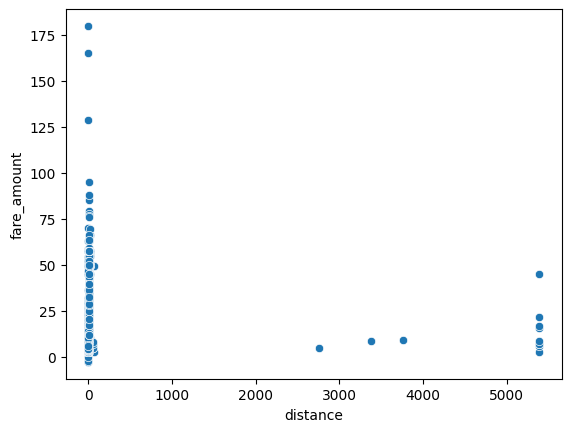

In [43]:
sns.scatterplot(data = df, x = 'distance', y = 'fare_amount')

# no such relation b/w fare amount and distance

# Passenger_count vs fare_amount

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

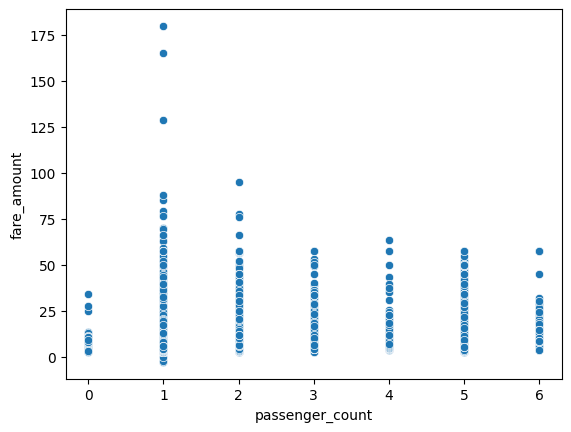

In [44]:
sns.scatterplot(data = df, x = 'passenger_count', y = 'fare_amount')

# no such relation b/w passenger_count and fare_amount

In [45]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [46]:
# Features & Target


# df.sample()

X = df.drop('fare_amount',axis=1)
X.shape

(9998, 12)

In [47]:
y = df.fare_amount
y.shape

(9998,)

# Train Train Split

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(9998, 12)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [50]:
X_train.shape

(7998, 12)

In [51]:
X_test.shape

(2000, 12)

In [52]:
X_train

array([[-0.14247075,  0.13810983, -0.14233209, ..., -0.69175397,
         1.05207537, -0.82909791],
       [-0.14130678,  0.14482455, -0.14308689, ...,  0.22907011,
        -0.10525731, -0.82909791],
       [-0.14233174,  0.14198911, -0.14021049, ...,  0.38254079,
        -0.10525731, -0.82909791],
       ...,
       [-0.14256613,  0.1374309 , -0.14543552, ..., -0.84522465,
        -0.85752356, -0.05809392],
       [-0.14477899,  0.13337992, -0.14105395, ..., -1.45910737,
        -1.37832326,  0.19890741],
       [-0.12350313,  0.11957583, -0.14314209, ..., -1.91951941,
        -1.20472336, -0.82909791]])

In [53]:
# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_train

In [54]:
# scaled_X_test = scaler.transform(X_test)

In [55]:
# scaled_X_test

In [56]:
# model = RandomForestRegressor(n_estimators=200)
# model.fit(scaled_X_train,y_train)

In [57]:
# model.score(scaled_X_test,y_test)

# Random Forest

In [58]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)

RandomForestRegressor()

#### RF Score

In [59]:
model_rf.score(X_test,y_test)

0.7610670836653821

# Linear Regression

In [60]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

#### LR Score

In [61]:
model_lr.score(X_test,y_test)

0.013682197046247624

# Decision Tree (CART)

In [62]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,y_train)

DecisionTreeRegressor()

#### DT Score

In [63]:
model_dt.score(X_test,y_test)

0.5326423079955465

#### Lasso Model

In [64]:
# Lasso, Ridge

In [65]:
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)


Lasso()

#### Lasso Score

In [66]:
model_lasso.score(X_test,y_test)

-0.0006468020182841538

# Model Ridge

In [67]:
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)


Ridge()

#### Ridge Score

In [68]:
model_ridge.score(X_test,y_test)

0.013683284465284218

# SVR Model

In [69]:
model_svr = SVR()

In [70]:
model_svr.fit(X_train,y_train)

SVR()

#### Svr Score

In [71]:
model_svr.score(X_test,y_test)

-0.08493029559428233

# OLS Model

In [72]:
sm_X_train = sm.add_constant(X_train)

In [73]:
model_sm = sm.OLS(y_train,sm_X_train)

In [74]:
result = model_sm.fit()

In [75]:
result.params

const    11.187681
x1        0.612747
x2        0.396061
x3       -0.285331
x4       -0.101801
x5        0.184494
x6        0.152783
x7        1.045876
x8        0.443631
x9        0.176717
x10      -0.279086
x11      -0.182931
x12       0.015045
dtype: float64

In [76]:
X_test.shape

(2000, 12)

In [77]:
y_test.shape

(2000,)

In [78]:
len(model_sm.score(result.params))

13

# Model KNN

In [79]:
model_knn =  KNeighborsRegressor()
model_knn.fit(X_train,y_train)

KNeighborsRegressor()

#### Knn score

In [80]:
model_knn.score(X_test,y_test)

-0.13690220583110668

# All Model Analysis

In [81]:
# all_models_errors_data = {'Model':[],'MSE':[],
#                              'MAE':[],
#                              'RMSE':[],
#                              'R2_Score':[],
#                          'Score':[],
#                          'Adaboost':[],
#                          'Cross_val_boost':[],
#                          'Cross_val_base_model':[]}


# all_models = [model_dt,model_knn,model_lasso,model_lr,model_rf,model_ridge,model_svr]

# for i in all_models:
#     y_pred = i.predict(X_test)
    
#     mse = mean_squared_error(y_test,y_pred)
#     rmse = mse**0.5
#     mae = mean_absolute_error(y_test,y_pred)
#     r2score = r2_score(y_test,y_pred)
#     model_score = i.score(X_test,y_test)
    
#     all_models_errors_data['Model'].append(str(i))
#     all_models_errors_data['MSE'].append(mse)
#     all_models_errors_data['MAE'].append(mae)
#     all_models_errors_data['RMSE'].append(rmse)
#     all_models_errors_data['R2_Score'].append(r2score)
#     all_models_errors_data['Score'].append(model_score)
    
#     boost_model = AdaBoostRegressor(estimator=i,n_estimators=10,
#                                 learning_rate=1)
#     boost_model.fit(X_train,y_train)

#     cv_boost_score = cross_val_score(boost_model,X,y,cv=5).mean()
    
#     boost_score = boost_model.score(X_test,y_test)
    
#     all_models_errors_data['Adaboost'].append(boost_score)
    
#     cv_base_score = cross_val_score(i,X,y,cv=5).mean()
    
#     all_models_errors_data['Cross_val_base_model'].append(cv_base_score)
#     all_models_errors_data['Cross_val_boost'].append(cv_boost_score)
    
#     print(str(i),'done')

# all_models_errors_df = pd.DataFrame(all_models_errors_data)
all_models_errors_df = pd.read_csv('all_models_errors_df.csv')
all_models_errors_df

,Model,MSE,MAE,RMSE,R2_Score,Score,Adaboost,Cross_val_boost,Cross_val_base_model
0,DecisionTreeRegressor(),35.393749,3.019750,5.949265,0.605862,0.605862,0.731441,0.701772,0.568582
1,KNeighborsRegressor(),102.094243,6.452995,10.104170,-0.136902,-0.136902,-0.527688,0.171292,0.385787
2,Lasso(),89.858457,6.002440,9.479370,-0.000647,-0.000647,-0.042784,-0.079198,0.008245
3,LinearRegression(),88.571707,5.949106,9.411254,0.013682,0.013682,-4.274253,-3.877186,0.012425
4,RandomForestRegressor(),21.310242,2.309570,4.616302,0.762693,0.762693,0.751939,0.755259,0.748931
5,Ridge(),88.571610,5.949078,9.411249,0.013683,0.013683,-0.093415,-4.402707,0.012425
6,SVR(),97.427146,5.410571,9.870519,-0.084930,-0.084930,-0.399940,-0.056584,-0.086936


In [82]:
# all_models_errors_df.to_csv('all_models_errors_df.csv',index=False)
# print('Done')

In [83]:
# Best Model Analysis:-
# MSE, MAE, RMSE:- Minimum
# Score, R2_Score:- Maximum
# Graphs 

In [84]:
final_all_model_df = all_models_errors_df[['Model','R2_Score','Adaboost','Cross_val_boost','Cross_val_base_model']]
final_all_model_df

,Model,R2_Score,Adaboost,Cross_val_boost,Cross_val_base_model
0,DecisionTreeRegressor(),0.605862,0.731441,0.701772,0.568582
1,KNeighborsRegressor(),-0.136902,-0.527688,0.171292,0.385787
2,Lasso(),-0.000647,-0.042784,-0.079198,0.008245
3,LinearRegression(),0.013682,-4.274253,-3.877186,0.012425
4,RandomForestRegressor(),0.762693,0.751939,0.755259,0.748931
5,Ridge(),0.013683,-0.093415,-4.402707,0.012425
6,SVR(),-0.084930,-0.399940,-0.056584,-0.086936


<Axes: xlabel='Model'>

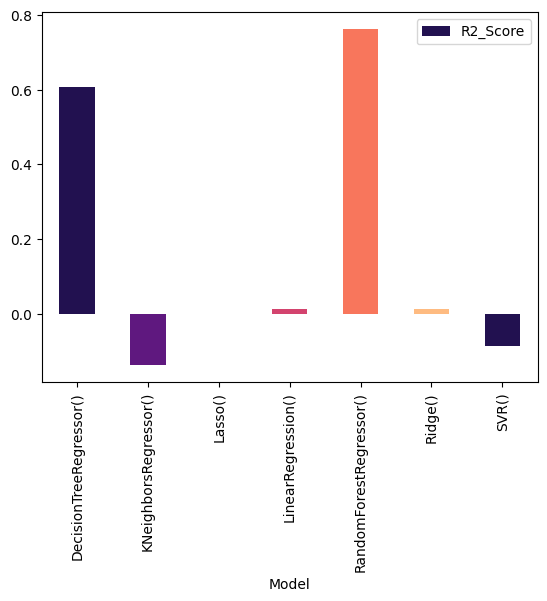

In [85]:
final_all_model_df.plot(kind='bar',x = 'Model',y = 'R2_Score',color = sns.color_palette('magma'))

# Best Model is Random Forest Based on R2_score

<Axes: xlabel='Model'>

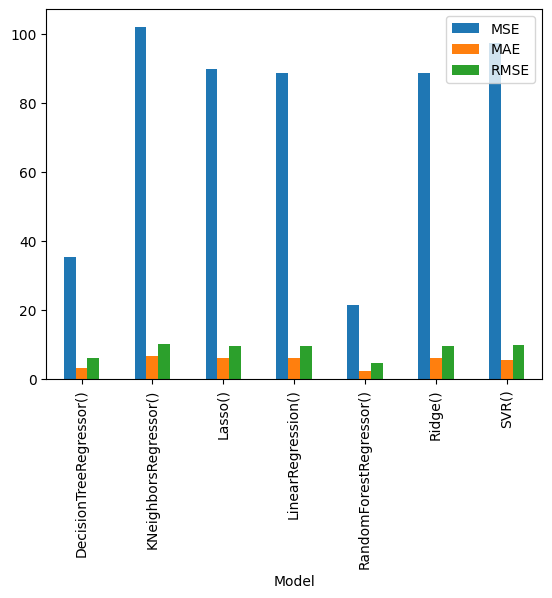

In [86]:
all_models_errors_df.plot(kind= 'bar',y = ['MSE','MAE','RMSE'], x = "Model")

# Best Model is Random Forest Based on Sum of squared errors

# PCA for Random Forest

In [87]:
pca_object = PCA(0.95)

In [88]:
X_pca = pca_object.fit_transform(X)

In [89]:
X_pca.shape[1]

1

In [90]:
pca_object.explained_variance_ratio_

array([0.96347642])

In [91]:
pca_object.n_components_

1

In [92]:
len(X.columns)

12

In [93]:
final_pca = PCA(n_components=1)
final_X = final_pca.fit_transform(X)

In [94]:
final_X.shape[1]

1

In [95]:
final_X_train_pca, final_X_test_pca, y_train, y_test = train_test_split(final_X,y,test_size=0.2,random_state=42)

In [96]:
final_pca_model_rf = RandomForestRegressor()
final_pca_model_rf.fit(final_X_train_pca,y_train)

RandomForestRegressor()

In [97]:
final_pca_model_rf.score(final_X_test_pca,y_test)

0.5759799732604647

In [98]:
X_train_pca_1, X_test_pca_1, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [99]:
final_pca_1_model_rf = RandomForestRegressor()
final_pca_1_model_rf.fit(X_train_pca_1,y_train)

RandomForestRegressor()

In [100]:
final_pca_1_model_rf.score(X_test_pca_1,y_test)

0.5460077089071355

In [101]:
# PCA conclusion:
# 1>> Pca did not support that much as expected
# 2>> 1 columns explained 58% accuracy
# 3>> 12 columns explained 75% accuracy
# 4>> we will proceed without pca

# Random Forest Model Hyperparameter Tune

In [102]:
param = {'n_estimators':range(50,200),
         'criterion':["squared_error", "absolute_error", "friedman_mse", "poisson"],
         'max_features':["sqrt", "log2", None]
        }
# model = GridSearchCV(RandomForestRegressor(),param_grid=param,return_train_score=False)

In [103]:
150-100

50

In [104]:
start_time = time.time()
mored_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)
score = model_rf.score(X_test,y_test)

end_time = time.time()

print(end_time- start_time)
print(score)

16.836674213409424
0.760544447389886


In [105]:
import threading as th


def return_score(n_est,crt,mf):
    global counter, fail_counter
    try:
        counter = 1
        fail_counter = 1
        
        X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=150 - n_est)
        model_rf = RandomForestRegressor(n_estimators=n_est,criterion = crt,max_features = mf)
        model_rf.fit(X_train,y_train)
        score = model_rf.score(X_test,y_test)

        all_score.append(score)
        all_n_est.append(n_est)
        all_crt.append(crt)
        all_max_fea.append(mf)
        all_random_state.append(150 - n_est)
        
        print(counter,'Try Success!!')
        counter += 1
    except:
        print(fail_counter,'Try fails!!')
        fail_counter += 1
    

In [106]:
all_score = []
all_n_est = []
all_crt = []
all_max_fea = []
all_random_state = []

param = {'n_estimators':range(50,101),
         'criterion':["squared_error", "absolute_error", "friedman_mse",],
         'max_features':["sqrt", "log2", None]
        }


all_threads = []

ite = 1
for i in param['n_estimators']:
    for j in param['criterion']:
        for k in param['max_features']:
            thread = th.Thread(target=return_score,args=[i,j,k])
            all_threads.append(thread)
            
print('Done')

Done


In [107]:
13*1800/(3600)

6.5

In [108]:
# warnings.filterwarnings('ignore')

# start_time = time.time()

# for index,i in enumerate(all_threads):
#     i.start()
    
# for j in all_threads:
#     j.join()
    
# end_time = time.time()
# print(end_time- start_time)



# final_matrix = {'Score':all_score,'Estimators':all_n_est,"Criterion":all_crt,"Max_features":all_max_fea,'Random State':all_random_state}

# matrix_df = pd.DataFrame(final_matrix)

# matrix_df.to_csv('matrix_df.csv',index=False)
# print('CSV Done')

In [110]:
matrix_df = pd.read_csv('matrix_df.csv')
matrix_df

,Score,Estimators,Criterion,Max_features,Random State
0,0.820523,50,squared_error,sqrt,100
1,0.822829,50,squared_error,log2,100
2,0.782581,51,squared_error,sqrt,99
3,0.777649,51,squared_error,log2,99
4,0.817836,50,friedman_mse,sqrt,100
...,...,...,...,...,...
454,0.790037,93,absolute_error,NaN,57
455,0.703206,97,absolute_error,NaN,53
456,0.796992,99,absolute_error,NaN,51
457,0.709561,98,absolute_error,NaN,52


In [111]:
matrix_df['Score'].max()


0.8515122212833567

In [112]:
matrix_df[matrix_df['Score'] == matrix_df['Score'].max()]

,Score,Estimators,Criterion,Max_features,Random State
249,0.851512,94,friedman_mse,sqrt,56


In [114]:
50*3*3

450

# Without threading

In [ ]:
# all_score = []
# all_n_est = []
# all_crt = []
# all_max_fea = []


# param = {'n_estimators':range(50,101),
#          'criterion':["squared_error", "absolute_error", "friedman_mse",],
#          'max_features':["sqrt", "log2", None]
#         }




# counter = 1
# for i in param['n_estimators']:
#     for j in param['criterion']:
#         for k in param['max_features']:
#             try:
#                 model_rf = RandomForestRegressor(n_estimators = i,criterion = j,max_features = k)
#                 model_rf.fit(X_train,y_train)
#                 score = model_rf.score(X_test,y_test)

#                 all_score.append(score)
#                 all_n_est.append(i)
#                 all_crt.append(j)
#                 all_max_fea.append(k)
                
#                 print(counter,'Done')
#                 counter+=1
#             except:
#                 print('Try Fails!!')
            
#             display(clear = True)

In [ ]:
# model.fit(X,y)

In [ ]:
# model.best_params_

In [ ]:
# model.best_score_

In [ ]:
# model.best_estimator_

In [115]:
matrix_df[matrix_df['Score'] == matrix_df['Score'].max()]

,Score,Estimators,Criterion,Max_features,Random State
249,0.851512,94,friedman_mse,sqrt,56


In [133]:
final_model = RandomForestRegressor(n_estimators = 94,criterion = 'friedman_mse',max_features = 'sqrt',random_state=1)
final_model.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      n_estimators=94, random_state=1)

In [134]:
final_model.score(X_test,y_test)

0.7830342745572587

# Save Best Model

In [138]:
import pickle
with open('fare_price_predict.pkl','wb') as f:
    pickle.dump(final_model,f)
    
print('Model Saved Successfully!!')

Model Saved Successfully!!


In [ ]:
# RF Model
# PCA
# RF Hyperparameter Tune
# Test :- score
# # Model save


In [140]:
# Predict using Saved Model

with open('fare_price_predict.pkl','rb') as f:
    saved_model = pickle.load(f)
    
print('Model Load Successfully!!')

Model Load Successfully!!


In [173]:
temp_data = X.sample()
no_of_passengers = 12
total_fare = round(saved_model.predict(temp_data)[0],2) * no_of_passengers

print("fare Price is: $",total_fare)
display(temp_data)

fare Price is: $ 651.84


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,hour,minute,second
8916,-73.982283,40.762099,-73.969927,40.801464,1,2.79255,2010,7,8,18,0,13


In [148]:
X['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4, 0], dtype=int64)

In [175]:
import pymysql as py

conn = py.Connect(user = 'root',host = 'localhost',password = '1401',autocommit = True)
print('Connection screated successfully!!!')

cur = conn.cursor()

cur.execute('create database taxi_complete_data')

print('done')

Connection screated successfully!!!
done


In [ ]:
cur.execute('')

In [179]:
q = '''create table taxi_complete_data.all_data 
(pickup_longitude varchar(200),
pickup_latitude varchar(200),
dropoff_longitude varchar(200),
dropoff_latitude varchar(200),
passenger_count varchar(200),
distance varchar(200),
year varchar(200),
month varchar(200),
day varchar(200),
hour varchar(200),
minute varchar(200),
second varchar(200))'''.replace('\n',' ')

cur.execute(q)

print('table created successfully!!')

table created successfully!!


In [ ]:
q = f'''insert into taxi_complete_data.all_data values
({pickup_longitude}, 
{pickup_latitude}, 
{dropoff_longitude}, 
{dropoff_latitude}, 
{passenger_count}, 
{distance}, 
{year}, 
{month}, 
{day}, 
{hour}, 
{minute}, {second})'''.replace('\n',' ')

cur.execute(q)
print('record inserted successfully!!!')

In [159]:
os.getcwd()

'C:\\Users\\Lenovo\\ML AI New Batch'

In [169]:
from datetime import datetime



pickup_datetime = datetime.strptime('2024-12-01T23:15','%Y-%m-%dT%H:%M')

pickup_datetime.month

12

In [171]:
X.sample()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,hour,minute,second
2579,-73.952388,40.772365,-73.975207,40.77849,1,1.269422,2014,2,17,23,20,59


In [ ]:
# Frontend
# Test code
# AWs deploy

# Conclusion